In [1]:
import numpy as np
import pandas as pd

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Input
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [3]:
import time

In [4]:
from sklearn.metrics import confusion_matrix

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
train_labels = pd.read_csv("/content/drive/MyDrive/DataDcience/train_labels_oversampled.csv")
train_values = pd.read_csv("/content/drive/MyDrive/DataDcience/train_values_oversampled.csv")

In [9]:
train_labels.drop(labels=['Unnamed: 0'],axis=1,inplace=True)
train_labels.head()

,damage_grade
0,3
1,2
2,3
3,2
4,3


In [10]:
train_labels["damage_grade"] = train_labels["damage_grade"] - 1
train_labels.head()

,damage_grade
0,2
1,1
2,2
3,1
4,2


In [11]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels, 3)

In [12]:
train_labels

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [13]:
train_values.drop(labels=['Unnamed: 0'],axis=1,inplace=True)
train_values.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,6,487,12198,2,0.500000,0.357143,0.428571,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,8,900,2812,2,0.166667,0.500000,0.714286,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,21,363,8973,2,0.166667,0.285714,0.428571,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,22,418,10694,2,0.166667,0.357143,0.428571,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,11,131,1488,3,0.500000,0.500000,1.000000,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [14]:
X_train, X_test, y_train, y_test = train_test_split(train_values, train_labels, test_size = 0.2, random_state = 42)

In [15]:
model = Sequential([
    Input(shape = (60)),
    Dense(128, activation='relu', use_bias=False),
    Dense(256, activation='relu', use_bias=False),
    Dense(128, activation='relu', use_bias=False),
    Dense(64, activation='relu', use_bias=False),
    Dense(3, activation='softmax', use_bias=False)
]) 

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
early_stopping=EarlyStopping(patience=22, verbose=1)

checkpointer=ModelCheckpoint(filepath='weights.hdf5', save_best_only=True, verbose=1)

start_time = time.time()
network_history = model.fit(X_train, y_train, batch_size=64, 
                            epochs=200, verbose=1, validation_split=0.2,
                  callbacks=[checkpointer, early_stopping])
dt_time_fit = time.time() - start_time

Epoch 1/100
4447/4448 [============================>.] - ETA: 0s - loss: 2.2873 - accuracy: 0.4503
Epoch 1: val_loss improved from inf to 0.92841, saving model to weights.hdf5
4448/4448 [==============================] - 29s 6ms/step - loss: 2.2871 - accuracy: 0.4503 - val_loss: 0.9284 - val_accuracy: 0.5278
Epoch 2/100
4442/4448 [============================>.] - ETA: 0s - loss: 0.9165 - accuracy: 0.5271
Epoch 2: val_loss improved from 0.92841 to 0.88538, saving model to weights.hdf5
4448/4448 [==============================] - 28s 6ms/step - loss: 0.9165 - accuracy: 0.5271 - val_loss: 0.8854 - val_accuracy: 0.5176
Epoch 3/100
4447/4448 [============================>.] - ETA: 0s - loss: 0.8886 - accuracy: 0.5406
Epoch 3: val_loss did not improve from 0.88538
4448/4448 [==============================] - 28s 6ms/step - loss: 0.8886 - accuracy: 0.5406 - val_loss: 0.9209 - val_accuracy: 0.5251
Epoch 4/100
4444/4448 [============================>.] - ETA: 0s - loss: 0.8676 - accuracy: 0.55

In [17]:
from keras.models import load_model
model = load_model("weights.hdf5")

In [18]:
start_time = time.time()
predictions_test = model.predict(X_test)
dt_time_pred = time.time() - start_time

2780/2780 [==============================] - 5s 2ms/step


In [19]:
print(predictions_test)

[[9.92317498e-01 1.83911416e-05 7.66426977e-03]
 [5.73482037e-01 3.11918557e-01 1.14599474e-01]
 [5.92232406e-01 3.94160777e-01 1.36067802e-02]
 ...
 [9.81839955e-01 1.80395711e-02 1.20393714e-04]
 [5.09648807e-02 8.31057608e-01 1.17977515e-01]
 [4.81291227e-02 3.78359437e-01 5.73511481e-01]]


In [20]:
predictions_test.shape

(88956, 3)

In [21]:
predictions_test = predictions_test.argmax(axis=1)
predictions_test 

array([0, 0, 0, ..., 0, 1, 2])

In [22]:
predictions_test = predictions_test + 1
predictions_test

array([1, 1, 1, ..., 1, 2, 3])

In [23]:
y_test = y_test.argmax(axis=1)
y_test 

array([0, 0, 0, ..., 0, 1, 1])

In [24]:
y_test = y_test + 1
y_test

array([1, 1, 1, ..., 1, 2, 2])

In [25]:
print("Fit Time: {} seconds".format(dt_time_fit))
print("Prediction Time: {} seconds".format(dt_time_pred))
print("Precision: ", metrics.precision_score(y_test,predictions_test, average='micro'))
print("Recall: ", metrics.recall_score(y_test,predictions_test,average='micro'))
print("Accuracy: ", metrics.accuracy_score(y_test,predictions_test))
print("F1_score: ", metrics.f1_score(y_test,predictions_test, average='micro'))

Fit Time: 2348.529511451721 seconds
Prediction Time: 10.588428497314453 seconds
Precision:  0.6623948918566482
Recall:  0.6623948918566482
Accuracy:  0.6623948918566482
F1_score:  0.6623948918566482


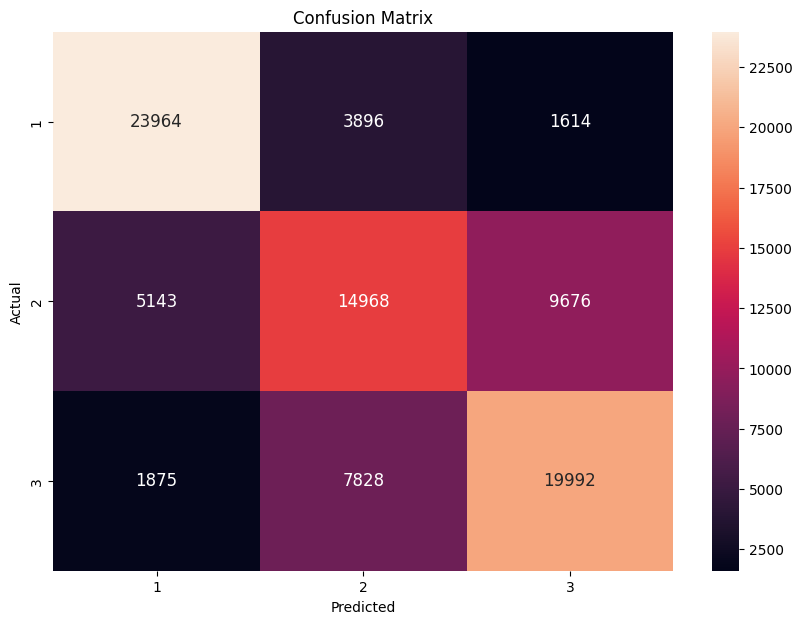

In [26]:
data = confusion_matrix(y_test,predictions_test)
cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt="d", annot_kws={"size": 12})
plt.title("Confusion Matrix")
plt.show()